In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC 
import numpy as np
from sklearn.metrics import accuracy_score

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       150 non-null    float64
 1   1       150 non-null    float64
 2   2       150 non-null    float64
 3   3       150 non-null    float64
 4   label   150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


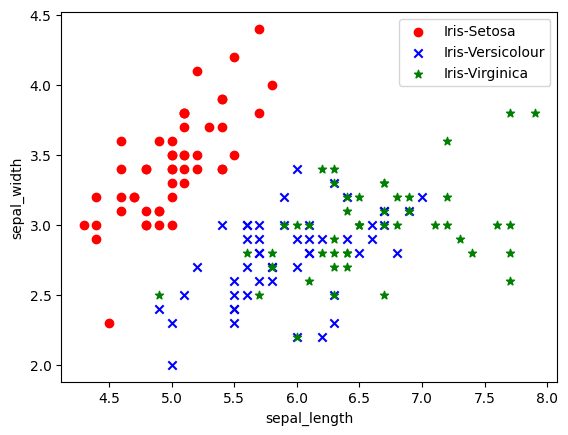

In [5]:
bc = datasets.load_iris()
df = pd.DataFrame(data = bc.data)
df["label"] = bc.target
df.info()

plt.scatter(df[0][df["label"] == 0], df[1][df["label"] == 0],
            color = "red", marker = 'o', label = 'Iris-Setosa')
plt.scatter(df[0][df["label"] == 1], df[1][df["label"] == 1],
            color = "blue", marker = 'x', label = 'Iris-Versicolour')
plt.scatter(df[0][df["label"] == 2], df[1][df["label"] == 2],
            color = "green", marker = '*', label = 'Iris-Virginica')
    
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.legend(loc="best")
plt.show()

In [4]:
x = df.iloc[:,0:2]
y = df['label']

In [38]:
svm = SVC(kernel = 'rbf', random_state = 1, gamma = 0.5 , C = 1)

svm.fit(x,y)

y_pred=svm.predict(x)

print(accuracy_score(y, y_pred))

0.8266666666666667


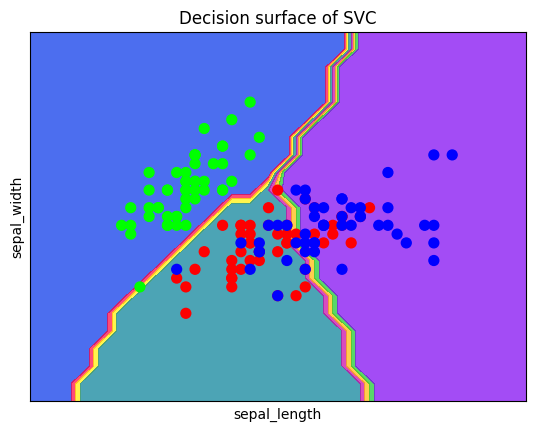

In [39]:
def plot_contours(ax,clf,xx,yy, **params):
    z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    z = z.reshape(xx.shape)
    out = ax.contourf(xx,yy,z,**params)
    return out

def make_meshgrid(x,y,h=0.2):
    x_min,x_max = x.min() - 1, x.max() + 1
    y_min,y_max = y.min() - 1, y.max() + 1
    xx,yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx,yy

fig,ax = plt.subplots()
title = ('Decision surface of SVC')
X0,X1 = x.iloc[:, 0], x.iloc[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, svm, xx, yy, cmap=plt.cm.prism, alpha=0.7)
ax.scatter(X0, X1, c=y, cmap=plt.cm.brg_r, s=50, alpha=1)
ax.set_xlabel('sepal_length')
ax.set_ylabel('sepal_width')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()